In [4]:
import pandas as pd
from pymongo import MongoClient
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta

import seaborn as sns
import matplotlib.pyplot as plt


# Last 6 month

In [3]:
client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations
all_eval = evaluations.count_documents({})
print(f"{all_eval} stored evaluation")

#unique_eval = evaluations.distinct("target_uri")
#print(unique_eval)

six_month_ago = datetime.now() - timedelta(days=180)

print(six_month_ago.isoformat())
print(datetime.now().isoformat())
sixm_eval = evaluations.count_documents({"started_at": {"$gt": six_month_ago}})
print(sixm_eval)

1454 stored evaluation
2023-12-24T09:49:34.208836
2024-06-21T09:49:34.208904
0


# Unique resources evaluated the last 6 months 

In [27]:
client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations

#print(f"{len(list(evaluations.find({})))} evaluations")
#print(f"{len(evaluations.distinct('target_uri'))} unique evaluated URLs")

six_month_ago = datetime.now() - timedelta(days=180)
#print(six_month_ago.isoformat())
#print(datetime.now().isoformat())
sixm_eval_unique = evaluations.find({"started_at": {"$gt": six_month_ago}}).distinct('target_uri')
print(f"{len(sixm_eval_unique)} unique resources evaluated the last 6 months. ")

13 unique resources evaluated the last 6 months. 


# Yearly

In [3]:
client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations

data = {}

for i in range(2018,2024):
    #print(i)
    start = datetime.fromisoformat(f'{i}-01-01')
    end = datetime.fromisoformat(f'{i+1}-01-01')
    count = evaluations.count_documents({"started_at": {"$gte": start, "$lt": end}})
    #print(f"FAIR-checker evaluations in {i}: {count}")
    data[str(i)] = [count]

df = pd.DataFrame(data)
df.to_csv("year.csv")
df

,2018,2019,2020,2021,2022,2023
0,0,0,0,0,349,143


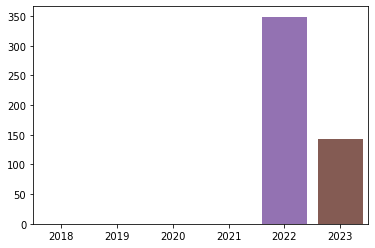

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.barplot(data=df)
plt.savefig("stats.png")

# Monthly

In [5]:
client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations

data_m = {}

for y in range(2018,2024):
    for m in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10","11", "12"]:
        start = datetime.fromisoformat(f'{y}-{m}-01')
        end = start + timedelta(days=30)
        count = evaluations.count_documents({"started_at": {"$gte": start, "$lt": end}})
        data_m[f"{y}-{m}"] = [count]

df_m = pd.DataFrame(data_m)
df_m.to_csv("months.csv")
df_m




,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,0,0,0,0,0,0,0,0,0,0,...,110,22,0,0,0,0,0,0,0,0


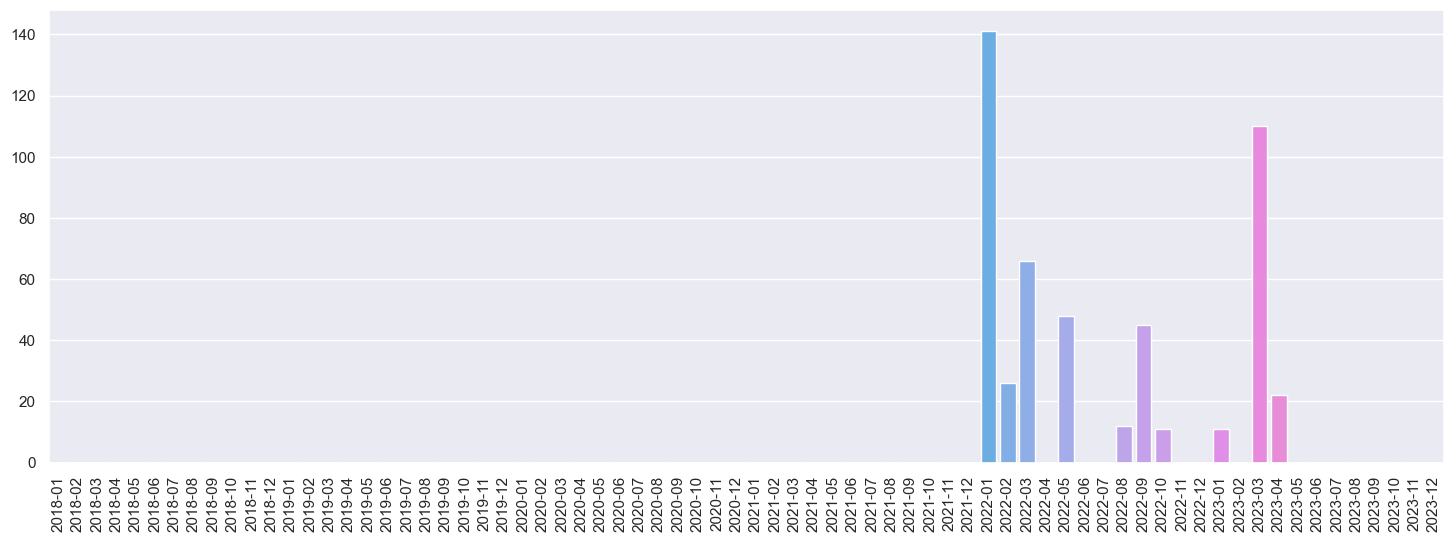

In [18]:


plt.rcParams["figure.figsize"]=(18,6)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 300

plt.xticks(rotation='vertical')

ax = sns.barplot(data=df_m)

In [19]:
ax.get_figure().savefig('monthly.pdf')
ax.get_figure().savefig('monthly.png')

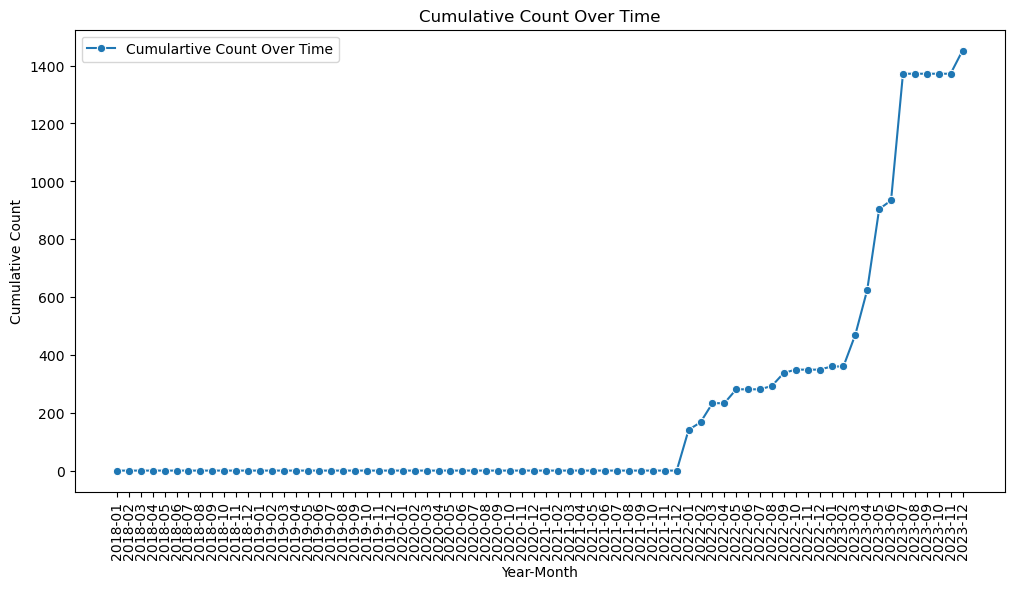

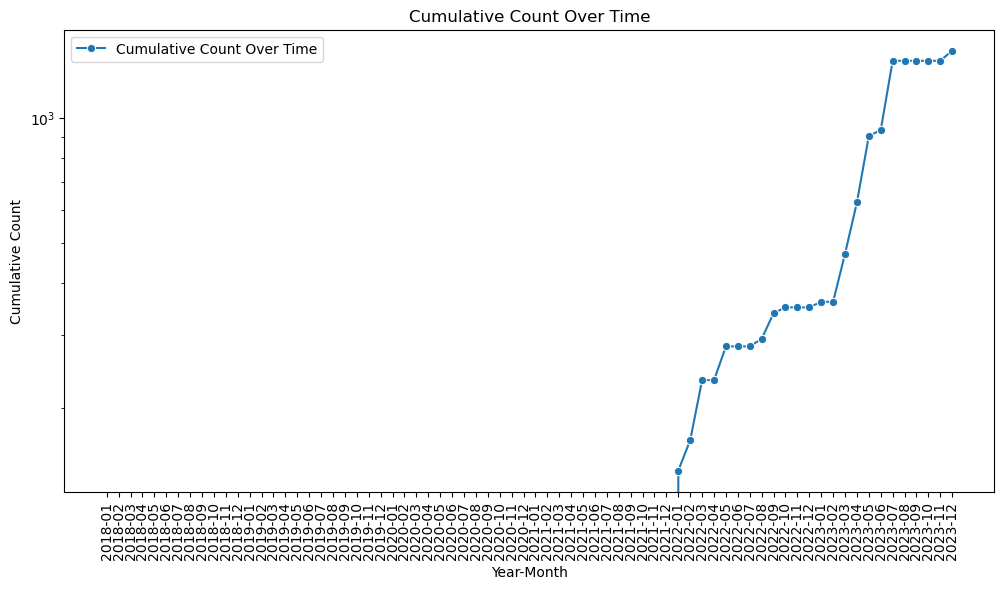

In [13]:
import seaborn as sns

client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations

data_m = {}

count = 0
for y in range(2018,2024):
    for m in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10","11", "12"]:
        start = datetime.fromisoformat(f'{y}-{m}-01')
        end = start + timedelta(days=30)
        count += evaluations.count_documents({"started_at": {"$gte": start, "$lt": end}})
        data_m[f"{y}-{m}"] = [count]

df_m = pd.DataFrame(data_m)
df_m.to_csv("cumulated_months.csv")
df_m


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_m.iloc[0], marker='o', label='Cumulartive Count Over Time') 
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Count Over Time')
plt.xticks(rotation=90)
plt.savefig('cumulative_count.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_m.iloc[0], marker='o', label='Cumulative Count Over Time') 
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Count Over Time')
plt.xticks(rotation=90)
plt.yscale('log')
plt.savefig('cumulative_count_log.png', dpi=300)
plt.show()

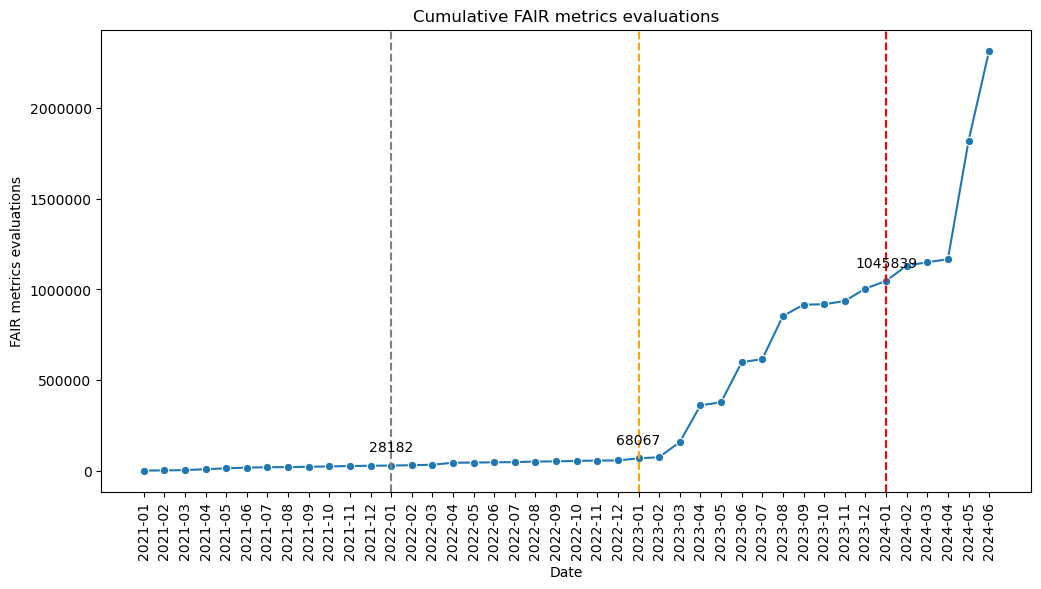

In [6]:
df_m = pd.read_csv("cumulative_evals.csv", index_col=0)

plt.figure(figsize=(12, 6))
#sns.lineplot(data=df_m.iloc[0], marker='o', label='Cumulartive Count Over Time') 
sns.lineplot(data=df_m.iloc[0], marker='o') 
plt.xlabel('Date')
plt.ylabel('FAIR metrics evaluations')
plt.title('Cumulative FAIR metrics evaluations')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')  # Remove scientific notation 

# add vertical lines for 2021
plt.axvline(x='2022-01', color='grey', linestyle='--')
plt.annotate(df_m['2022-01'][0], ('2022-01', df_m['2022-01'][0]), textcoords="offset points", xytext=(0,10), ha='center')

# add vertical lines for 2022
plt.axvline(x='2023-01', color='orange', linestyle='--')
plt.annotate(df_m['2023-01'][0], ('2023-01', df_m['2023-01'][0]), textcoords="offset points", xytext=(0,10), ha='center')

# add vertical lines for 2023
plt.axvline(x='2024-01', color='red', linestyle='--')
plt.annotate(df_m['2024-01'][0], ('2024-01', df_m['2024-01'][0]), textcoords="offset points", xytext=(0,10), ha='center')

plt.savefig('cumulative_count.png', dpi=300, bbox_inches = 'tight')
plt.savefig('cumulative_count.pdf', dpi=300, bbox_inches = 'tight')

plt.show()



# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df_m.iloc[0], marker='o', label='Cumulative Count Over Time') 
# plt.xlabel('Year-Month')
# plt.ylabel('Cumulative Count')
# plt.title('Cumulative Count Over Time')
# plt.xticks(rotation=90)
# plt.ticklabel_format(style='plain', axis='y')  # Remove scientific notation 
# plt.yscale('log')
# #plt.savefig('cumulative_count_log.png', dpi=300)

# plt.axvline(x='2023-01', color='red', linestyle='--')
# plt.annotate(df_m['2023-01'][0], ('2023-01', df_m['2023-01'][0]), textcoords="offset points", xytext=(0,10), ha='center')

# plt.axvline(x='2024-01', color='orange', linestyle='--')
# plt.annotate(df_m['2024-01'][0], ('2024-01', df_m['2024-01'][0]), textcoords="offset points", xytext=(0,10), ha='center')

# plt.show()

# Assessed domains 

In [8]:
from urllib.parse import urlparse

client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations

domains = {}

for e in evaluations.find({}):
    url = urlparse(e["target_uri"])
    d = url.netloc
    if not d in domains.keys():
        domains[d] = 1
    domains[d] += 1

json_data = []
print(domains)
for d in domains.keys():
    json_data.append({"domain":d, "FAIReval":domains[d]})
    
df_domains = pd.DataFrame(json_data)

df_sorted = df_domains.sort_values(by="FAIReval", ascending=False)
df_sorted.to_csv("domains.csv")

{'bio.tools': 346, 'doi.pangaea.de': 76, 'workflowhub.eu': 47, 'search.datacite.org': 27}


# Top 20 evaluated domains 

<AxesSubplot:xlabel='domain', ylabel='FAIReval'>

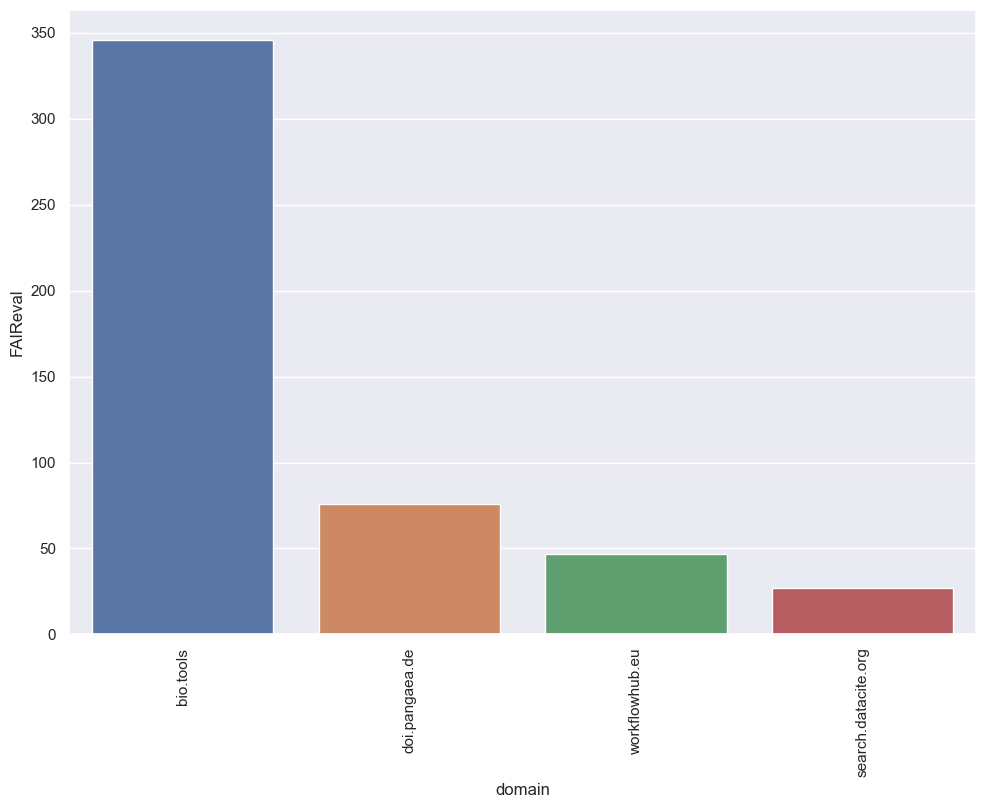

In [23]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.barplot(x=df_domains["domain"].head(20), y=df_domains["FAIReval"])
ax.tick_params(axis='x', rotation=90)
ax

In [17]:
ax.get_figure().savefig('domains.pdf')
ax.get_figure().savefig('domains.png')

In [63]:
from string import Template
from rdflib import ConjunctiveGraph

FC_spec = [
    {'id': 'F1A', 'category': 'Findable', 'label': 'Unique IDs', 'definition': ''}, 
    {'id': 'F1B', 'category': 'Findable', 'label': 'Persistent IDs', 'definition': ''}, 
    {'id': 'F2A', 'category': 'Findable', 'label': 'Structured metadata', 'definition': ''}, 
    {'id': 'F2B', 'category': 'Findable', 'label': 'Shared vocabularies for metadata', 'definition': ''}, 
    {'id': 'A11', 'category': 'Accessible', 'label': 'Open resolution protocol', 'definition': ''}, 
    {'id': 'A12', 'category': 'Accessible', 'label': 'Authorisation procedure or access rights', 'definition': ''}, 
    {'id': 'I1', 'category': 'Interoperable', 'label': 'Machine readable format', 'definition': ''}, 
    {'id': 'I2', 'category': 'Interoperable', 'label': 'Use shared ontologies', 'definition': ''}, 
    {'id': 'I3', 'category': 'Interoperable', 'label': 'External links', 'definition': ''}, 
    {'id': 'R11', 'category': 'Reusable', 'label': 'Metadata includes license', 'definition': ''}, 
    {'id': 'R12', 'category': 'Reusable', 'label': 'Metadata includes provenance', 'definition': ''}, 
    {'id': 'R13', 'category': 'Reusable', 'label': 'Community standards', 'definition': ''}
]

prefix = """
@prefix daq: <http://purl.org/eis/vocab/daq#> .
@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix dqv: <http://www.w3.org/ns/dqv#> .
@prefix duv: <http://www.w3.org/ns/duv#> .
@prefix oa: <http://www.w3.org/ns/oa#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix sdmx-attribute: <http://purl.org/linked-data/sdmx/2009/attribute#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

@prefix : <https://fair-checker.france-bioinformatique.fr/data#> .

"""

FAIR_Checker_template = """
:$metric_id
    a dqv:Dimension ;
    skos:prefLabel "$metric_label"@en ;
    skos:definition "$metric_definition"@en ;
    dqv:inCategory :$category ."""

metrics_tpl = """
:$id
    a dqv:QualityMeasurement ;
    dqv:computedOn <$url> ;
    dqv:isMeasurementOf :$dimension ;
    dqv:value "$value"^^xsd:integer ;
    prov:generatedAtTime "$date"^^xsd:dateTime ;
    prov:wasAttributedTo <https://github.com/IFB-ElixirFr/fair-checker> ;
    rdfs:seeAlso <https://doi.org/10.1186/s13326-023-00289-5> ."""

client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations

with open('fc_evaluations_dump.ttl', mode='w') as file_object:
    print(prefix, file=file_object)

    for spec in FC_spec:
        spec_ttl = Template(FAIR_Checker_template).safe_substitute(metric_id=spec['id'], 
                                                              metric_label=spec['label'], 
                                                              metric_definition=spec['definition'], 
                                                              category=spec['category'])
        print(spec_ttl, file=file_object)
    
    i = 0
    for e in evaluations.find({}):
        d = None
        if e["ended_at"]:
            d = e["ended_at"].isoformat()
        if e['success']:
            eval_ttl = Template(metrics_tpl).safe_substitute(id=str(e['_id']), 
                                                          url=e['target_uri'].strip(), 
                                                          dimension=e['metrics'], 
                                                          value=e['success'],
                                                          date=d)
            print(eval_ttl, file=file_object)
            i+=1 
        if (i % 1000) == 0:
            print(f"Serialized {i} FAIR metrics evaluations")
            break

Serialized 1000 FAIR metrics evaluations


In [60]:
from rdflib import ConjunctiveGraph

kg = ConjunctiveGraph()
kg.parse("fc_evaluations_dump.ttl", format="turtle")
print(f"Loaded {len(kg)} triples.")

Loaded 9666 triples.


# SPARQL stat queries 

In [47]:
#Unique evaluated resources  
q = """
PREFIX dqv: <http://www.w3.org/ns/dqv#>

SELECT (count(distinct ?obj) as ?count) WHERE {
  ?sub dqv:computedOn ?obj .
} 
"""

res = kg.query(q)
for r in res:
    print(r)

(rdflib.term.Literal('20', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


In [51]:
#Improved FAIRness
q1 = """
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dqv: <http://www.w3.org/ns/dqv#>

SELECT distinct ?url ?delta_day ?p ?m1_value ?m2_value WHERE {
  ?m1 dqv:computedOn ?url .
  ?m1 prov:generatedAtTime ?d1 .
  ?m1 dqv:value ?m1_value .
  ?m1 dqv:isMeasurementOf ?p .
  
  ?m2 dqv:computedOn ?url .
  ?m2 prov:generatedAtTime ?d2 .
  ?m2 dqv:value ?m2_value .
  ?m2 dqv:isMeasurementOf ?p .

  filter (?d1 < ?d2)
  filter (?m2_value > ?m1_value)
  bind( ?d2 - ?d1 as ?delta )
  bind( day(?d2 - ?d1) as ?delta_day )
} 
"""

q2 = """
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dqv: <http://www.w3.org/ns/dqv#>

SELECT (count(distinct ?url) as ?fairer_resources)  WHERE {
  ?m1 dqv:computedOn ?url .
  ?m1 prov:generatedAtTime ?d1 .
  ?m1 dqv:value ?m1_value .
  ?m1 dqv:isMeasurementOf ?p .
  
  ?m2 dqv:computedOn ?url .
  ?m2 prov:generatedAtTime ?d2 .
  ?m2 dqv:value ?m2_value .
  ?m2 dqv:isMeasurementOf ?p .

  filter (?d1 < ?d2)
  filter (?m2_value > ?m1_value)
  bind( ?d2 - ?d1 as ?delta )
  bind( day(?d2 - ?d1) as ?delta_day )
  filter (year(?d1) > 2019)
} 
"""

res = kg.query(q2)
for r in res:
    print(r)

(rdflib.term.Literal('4', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


In [ ]:
fairer_resources = [
    (2020, 13),
    (2021, 471),
    (2022, 76), 
    (2023, ), 
    (2024, )
]

In [62]:
# F delta last in 2023
q = """
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dqv: <http://www.w3.org/ns/dqv#>
PREFIX : <https://fair-checker.france-bioinformatique.fr/data#> 

SELECT (count(distinct ?m1) as ?nb_F_success) (count(distinct ?m2) as ?nb_F_failure)  WHERE {
  ?m1 prov:generatedAtTime ?d1 .
  ?m1 dqv:value ?m1_value .
  ?m1 dqv:isMeasurementOf ?p1 .
  #?p1 dqv:inCategory :Findable
  filter (?m1_value >= 1)
  
  ?m2 prov:generatedAtTime ?d2 .
  ?m2 dqv:value ?m2_value .
  ?m2 dqv:isMeasurementOf ?p2 .
  #?p2 dqv:inCategory :Findable
  filter (?m2_value < 1)
  
  filter((year(?d1) = 2023) && (year(?d2) = 2023))
} 
"""

q2 = """
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dqv: <http://www.w3.org/ns/dqv#>
PREFIX : <https://fair-checker.france-bioinformatique.fr/data#> 

SELECT (count(distinct ?m1) as ?nb_F_success) (count(distinct ?m2) as ?nb_F_failure) ?year  WHERE {
  VALUES ?year {2019 2020 2021 2022 2023 2024}
  
  ?m1 prov:generatedAtTime ?d1 .
  ?m1 dqv:value ?m1_value .
  ?m1 dqv:isMeasurementOf ?p1 .
  #?p1 dqv:inCategory :Reusable .
  filter (?m1_value >= 1)
  
  ?m2 prov:generatedAtTime ?d2 .
  ?m2 dqv:value ?m2_value .
  ?m2 dqv:isMeasurementOf ?p2 .
  #?p2 dqv:inCategory :Reusable .
  filter (?m2_value < 1)
  
  filter((year(?d1) = ?year) && (year(?d2) = ?year))
} 
GROUP BY ?year
"""

res = kg.query(q)
for r in res:
    print(r)

KeyboardInterrupt: 

## FAIRer resources

In [ ]:
client = MongoClient()
db = client.fair_checker
evaluations = db.evaluations



db.books.aggregate([
   { $group : { _id : "$author", books: { $push: "$title" } } }
 ])